# <a id='toc1_'></a>[Loan Default Prediction (EDA)](#toc0_)

**Table of contents**<a id='toc0_'></a>    
- [Loan Default Prediction (EDA)](#toc1_)    
  - [Libraries](#toc1_1_)    
    - [Global preferences](#toc1_1_1_)    
  - [Read data](#toc1_2_)    
  - [EDA](#toc1_3_)    
    - [Variables names](#toc1_3_1_)    
    - [Categorical and continous](#toc1_3_2_)    
    - [Value counts](#toc1_3_3_)    
    - [Dates](#toc1_3_4_)    
    - [Similar variables](#toc1_3_5_)    
    - [Null values](#toc1_3_6_)    
    - [Nulls by row](#toc1_3_7_)    
    - [Correlation](#toc1_3_8_)    
    - [Regions](#toc1_3_9_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_1_'></a>[Libraries](#toc0_)

In [36]:
# Basic python
import re
import sys

# Data manipulation
import polars as pl

# Visualization
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# appending a path
sys.path.append('../src/')

# Own modules
import helpers as hp


### <a id='toc1_1_1_'></a>[Global preferences](#toc0_)

In [37]:
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (18,10)

## <a id='toc1_2_'></a>[Read data](#toc0_)

In [38]:
# Define file path
path = "../data/raw/"
raw_file = "definitely_not_from_kaggle_loan_default_dataset.csv"

In [39]:
# Read data
df = pl.read_csv(path + raw_file)

In [40]:
df.head(3)

uuid,credit_application_date,default,person_bith_year_month_1_no_aggregation,activity_date_36_month_1_no_aggregation,location_cluster_03_month_1_most_frequent,contract_type_1_month_1_no_aggregation,activity_pattern_35_month_1_no_aggregation,activity_pattern_34_month_12_no_aggregation,activity_pattern_17_month_12_no_aggregation,activity_pattern_02_month_12_no_aggregation,device_age_2_month_1_social_mean,activity_pattern_09_last_12_months_max,client_type_1_month_9_no_aggregation,activity_pattern_07_last_9_months_max,activity_pattern_07_last_12_months_max,line_balance_type_11_last_12_months_max,line_balance_type_09_last_9_months_mean,activity_pattern_21_weekend_month_12_no_aggregation,activity_pattern_09_last_6_months_max,activity_pattern_09_last_9_months_max,line_balance_type_09_last_12_months_mean,activity_pattern_17_month_9_no_aggregation,line_balance_type_01_last_3_months_min,plan_data_month_12_no_aggregation,activity_pattern_25_last_12_months_min,data_usage_pattern_fortnight_1_last_12_months_max,location_work_null_month_9_no_aggregation,line_balance_type_01_last_6_months_min,activity_pattern_21_weekdaynight_month_12_no_aggregation,activity_pattern_03_weekend_month_6_no_aggregation,activity_pattern_25_last_9_months_min,mobility_pattern_03_last_3_months_mean,data_usage_pattern_days_last_6_months_min,activity_pattern_02_month_1_no_aggregation,activity_pattern_02_last_12_months_mean,billing_pattern_03_last_12_months_mean,…,activity_pattern_14_last_12_months_mean,activity_pattern_12_last_12_months_mean,activity_pattern_05_weekdaylight_last_3_months_mean,activity_pattern_14_last_9_months_mean,device_age_3_month_12_no_aggregation,credit_default_home_last_12_months_min,activity_pattern_14_last_6_months_max,device_technology_2_month_1_no_aggregation,activity_pattern_11_month_12_no_aggregation,device_count_1_month_1_no_aggregation,activity_pattern_27_last_9_months_mean,activity_pattern_21_weekdaynight_last_12_months_max,data_usage_pattern_time_8_month_1_social_min,line_balance_type_04_last_6_months_max,mobility_pattern_05_month_6_no_aggregation,data_usage_pattern_time_5_month_1_social_mean,data_usage_pattern_week_1_last_9_months_mean,location_cluster_02_month_9_no_aggregation,credit_default_work_last_6_months_mean,line_balance_type_07_last_9_months_min,data_usage_pattern_fortnight_1_last_9_months_mean,activity_pattern_11_last_9_months_max,activity_pattern_10_month_6_no_aggregation,activity_pattern_10_month_9_no_aggregation,line_months_active_2_last_12_months_mean,data_usage_pattern_days_last_3_months_mean,activity_pattern_10_weekend_last_3_months_mean,data_usage_pattern_fortnight_4_last_6_months_max,activity_pattern_11_weekdaylight_month_1_no_aggregation,activity_pattern_21_weekdaylight_last_12_months_max,location_cluster_02_month_1_no_aggregation,activity_pattern_22_weekend_last_3_months_min,mobility_pattern_05_last_6_months_min,activity_pattern_08_last_9_months_min,activity_pattern_28_last_3_months_mean,device_age_2_month_6_no_aggregation,activity_pattern_11_weekdaynight_month_9_no_aggregation
str,str,f64,f64,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""ab5191f0-5bf7-48d7-b52b-046316…","""2022-04-29""",1.0,1999.0,"""2019-03-01""","""REGION_5""","""TYPE_2""",-184.249,22.0,-224.048,-27.9704,-104.1362,-180.4017,12.7514,234.0074,-414.8524,null,null,-198.5122,-14.5693,254.6177,null,130.2402,null,-172.1113,-67.5607,24.5808,28.0,null,-270.9978,-361.9366,116.7504,-55.6501,154.7281,312.7052,-64.8508,151.8844,…,-134.2671,177.1795,244.5875,3.7521,null,-5.4105,-151.4378,94.8894,-303.3621,-15.1243,-99.0,348.433,-91.2841,null,-252.5821,-35.0847,415.4933,1140.2032,93.1231,null,-299.9051,309.5891,-411.5654,-115.208,89.8558,-382.5563,-281.5171,-115.3785,150.4016,-250.0021,-727.2061,-410.8231,-107.3805,85.0,-19.0,-

## <a id='toc1_3_'></a>[EDA](#toc0_)

### <a id='toc1_3_1_'></a>[Variables names](#toc0_)

In [41]:
# Total of date variables
hp.get_similar_variables(df, "date")

['credit_application_date', 'activity_date_36_month_1_no_aggregation']

In [42]:
hp.get_similar_variables(df, "location")

['location_cluster_03_month_1_most_frequent',
 'location_work_null_month_9_no_aggregation',
 'location_work_null_month_1_no_aggregation',
 'location_cluster_02_last_12_months_max',
 'location_cluster_02_last_6_months_max',
 'location_haversine_weekend_last_9_months_min',
 'location_cluster_02_month_9_no_aggregation',
 'location_cluster_02_month_1_no_aggregation']

### <a id='toc1_3_2_'></a>[Categorical and continous](#toc0_)

In [43]:
nuniques = df.select(pl.all().drop_nulls().n_unique())
nuniques

uuid,credit_application_date,default,person_bith_year_month_1_no_aggregation,activity_date_36_month_1_no_aggregation,location_cluster_03_month_1_most_frequent,contract_type_1_month_1_no_aggregation,activity_pattern_35_month_1_no_aggregation,activity_pattern_34_month_12_no_aggregation,activity_pattern_17_month_12_no_aggregation,activity_pattern_02_month_12_no_aggregation,device_age_2_month_1_social_mean,activity_pattern_09_last_12_months_max,client_type_1_month_9_no_aggregation,activity_pattern_07_last_9_months_max,activity_pattern_07_last_12_months_max,line_balance_type_11_last_12_months_max,line_balance_type_09_last_9_months_mean,activity_pattern_21_weekend_month_12_no_aggregation,activity_pattern_09_last_6_months_max,activity_pattern_09_last_9_months_max,line_balance_type_09_last_12_months_mean,activity_pattern_17_month_9_no_aggregation,line_balance_type_01_last_3_months_min,plan_data_month_12_no_aggregation,activity_pattern_25_last_12_months_min,data_usage_pattern_fortnight_1_last_12_months_max,location_work_null_month_9_no_aggregation,line_balance_type_01_last_6_months_min,activity_pattern_21_weekdaynight_month_12_no_aggregation,activity_pattern_03_weekend_month_6_no_aggregation,activity_pattern_25_last_9_months_min,mobility_pattern_03_last_3_months_mean,data_usage_pattern_days_last_6_months_min,activity_pattern_02_month_1_no_aggregation,activity_pattern_02_last_12_months_mean,billing_pattern_03_last_12_months_mean,…,activity_pattern_14_last_12_months_mean,activity_pattern_12_last_12_months_mean,activity_pattern_05_weekdaylight_last_3_months_mean,activity_pattern_14_last_9_months_mean,device_age_3_month_12_no_aggregation,credit_default_home_last_12_months_min,activity_pattern_14_last_6_months_max,device_technology_2_month_1_no_aggregation,activity_pattern_11_month_12_no_aggregation,device_count_1_month_1_no_aggregation,activity_pattern_27_last_9_months_mean,activity_pattern_21_weekdaynight_last_12_months_max,data_usage_pattern_time_8_month_1_social_min,line_balance_type_04_last_6_months_max,mobility_pattern_05_month_6_no_aggregation,data_usage_pattern_time_5_month_1_social_mean,data_usage_pattern_week_1_last_9_months_mean,location_cluster_02_month_9_no_aggregation,credit_default_work_last_6_months_mean,line_balance_type_07_last_9_months_min,data_usage_pattern_fortnight_1_last_9_months_mean,activity_pattern_11_last_9_months_max,activity_pattern_10_month_6_no_aggregation,activity_pattern_10_month_9_no_aggregation,line_months_active_2_last_12_months_mean,data_usage_pattern_days_last_3_months_mean,activity_pattern_10_weekend_last_3_months_mean,data_usage_pattern_fortnight_4_last_6_months_max,activity_pattern_11_weekdaylight_month_1_no_aggregation,activity_pattern_21_weekdaylight_last_12_months_max,location_cluster_02_month_1_no_aggregation,activity_pattern_22_weekend_last_3_months_min,mobility_pattern_05_last_6_months_min,activity_pattern_08_last_9_months_min,activity_pattern_28_last_3_months_mean,device_age_2_month_6_no_aggregation,activity_pattern_11_weekdaynight_month_9_no_aggregation
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,…,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
25000,407,2,89,86,9,3,51,43,87,22,54,20,7,42,37,16,72,58,20,23,73,84,49,37,36,99,2,49,47,78,40,97,86,23,47,69,…,99,46,36,99,95,1166,99,2,91,8,23,46,3820,13,95,2233,99,298,2020,18,99,77,83,84,221,1693,68,4482,82,57,308,40,85,32,32,51,64


In [44]:
binary_vars = [col.name for col in df.select(pl.all().drop_nulls().n_unique()<3) if col.all()]
binary_vars

['default',
 'location_work_null_month_9_no_aggregation',
 'plan_type_na_month_1_no_aggregation',
 'mobility_pattern_08_month_1_no_aggregation',
 'location_work_null_month_1_no_aggregation',
 'device_technology_2_month_1_no_aggregation']

### <a id='toc1_3_3_'></a>[Value counts](#toc0_)

In [45]:
# Check if this is indeed binary variable
df["location_work_null_month_9_no_aggregation"].value_counts()

location_work_null_month_9_no_aggregation,count
f64,u32
null,4620
29.5569,8333
28.0,12047


In [46]:
# Count all regions
df['location_cluster_03_month_1_most_frequent'].value_counts()

location_cluster_03_month_1_most_frequent,count
str,u32
"""REGION_4""",1309
"""REGION_1""",365
"""REGION_9""",10925
null,2493
"""REGION_5""",1812
"""REGION_3""",463
"""REGION_8""",1751
"""REGION_7""",4145
"""REGION_6""",1197


In [47]:
# Count all different types
df['contract_type_1_month_1_no_aggregation'].value_counts()

contract_type_1_month_1_no_aggregation,count
str,u32
"""TYPE_3""",1912
"""TYPE_2""",3598
"""TYPE_1""",10506
null,8984


In [48]:
# How many default values are in dataset
df["default"].drop_nulls().value_counts(normalize=True)

default,proportion
f64,f64
1.0,0.174779
0.0,0.825221


### <a id='toc1_3_4_'></a>[Dates](#toc0_)

In [49]:
# Check date range in train set and test set
train = df.filter(pl.col("default").is_not_null()).with_columns(pl.col("credit_application_date").cast(pl.Date()))
temp = train.sort(by="credit_application_date").group_by_dynamic("credit_application_date", every="1mo").agg(pl.col("default").sum())

In [50]:
temp["credit_application_date"].min(), temp["credit_application_date"].max(), len(temp["credit_application_date"])

(datetime.date(2021, 9, 1), datetime.date(2022, 10, 1), 14)

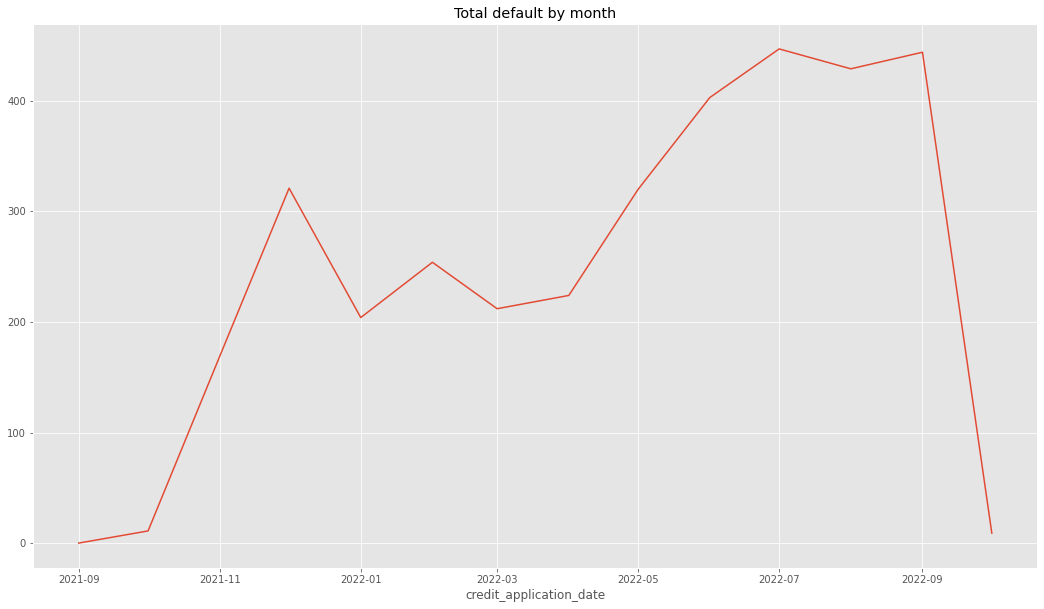

In [51]:
plt.plot(temp["credit_application_date"], temp["default"]);
plt.title("Total default by month");
plt.xlabel("credit_application_date");

### <a id='toc1_3_5_'></a>[Similar variables](#toc0_)

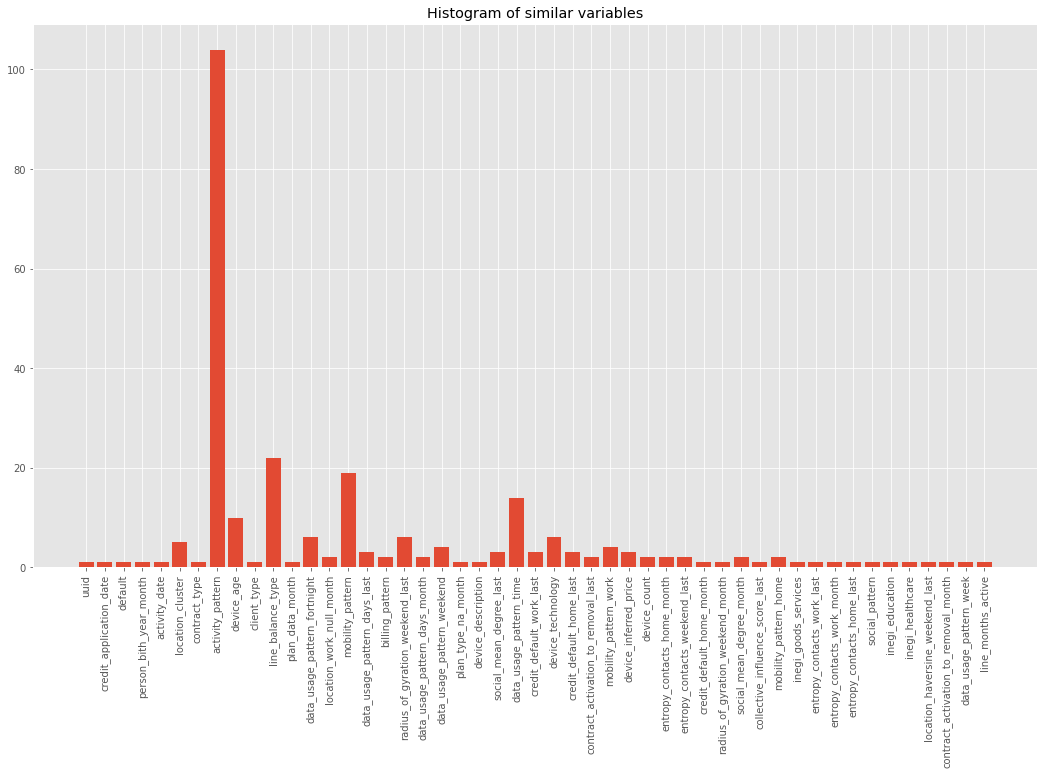

In [52]:
# Show total of variables grouped by similar names
base_names =  hp.count_similar_vars(df)
plt.bar(base_names.keys(), base_names.values());
plt.title("Histogram of similar variables")
plt.xticks(rotation=90);

In [53]:
# Count total of diferent dtypes
dict((x,df.dtypes.count(x)) for x in set(df.dtypes))

{Float64: 252, String: 5}

In [54]:
# Brief polars description of data
df.describe()

statistic,uuid,credit_application_date,default,person_bith_year_month_1_no_aggregation,activity_date_36_month_1_no_aggregation,location_cluster_03_month_1_most_frequent,contract_type_1_month_1_no_aggregation,activity_pattern_35_month_1_no_aggregation,activity_pattern_34_month_12_no_aggregation,activity_pattern_17_month_12_no_aggregation,activity_pattern_02_month_12_no_aggregation,device_age_2_month_1_social_mean,activity_pattern_09_last_12_months_max,client_type_1_month_9_no_aggregation,activity_pattern_07_last_9_months_max,activity_pattern_07_last_12_months_max,line_balance_type_11_last_12_months_max,line_balance_type_09_last_9_months_mean,activity_pattern_21_weekend_month_12_no_aggregation,activity_pattern_09_last_6_months_max,activity_pattern_09_last_9_months_max,line_balance_type_09_last_12_months_mean,activity_pattern_17_month_9_no_aggregation,line_balance_type_01_last_3_months_min,plan_data_month_12_no_aggregation,activity_pattern_25_last_12_months_min,data_usage_pattern_fortnight_1_last_12_months_max,location_work_null_month_9_no_aggregation,line_balance_type_01_last_6_months_min,activity_pattern_21_weekdaynight_month_12_no_aggregation,activity_pattern_03_weekend_month_6_no_aggregation,activity_pattern_25_last_9_months_min,mobility_pattern_03_last_3_months_mean,data_usage_pattern_days_last_6_months_min,activity_pattern_02_month_1_no_aggregation,activity_pattern_02_last_12_months_mean,…,activity_pattern_14_last_12_months_mean,activity_pattern_12_last_12_months_mean,activity_pattern_05_weekdaylight_last_3_months_mean,activity_pattern_14_last_9_months_mean,device_age_3_month_12_no_aggregation,credit_default_home_last_12_months_min,activity_pattern_14_last_6_months_max,device_technology_2_month_1_no_aggregation,activity_pattern_11_month_12_no_aggregation,device_count_1_month_1_no_aggregation,activity_pattern_27_last_9_months_mean,activity_pattern_21_weekdaynight_last_12_months_max,data_usage_pattern_time_8_month_1_social_min,line_balance_type_04_last_6_months_max,mobility_pattern_05_month_6_no_aggregation,data_usage_pattern_time_5_month_1_social_mean,data_usage_pattern_week_1_last_9_months_mean,location_cluster_02_month_9_no_aggregation,credit_default_work_last_6_months_mean,line_balance_type_07_last_9_months_min,data_usage_pattern_fortnight_1_last_9_months_mean,activity_pattern_11_last_9_months_max,activity_pattern_10_month_6_no_aggregation,activity_pattern_10_month_9_no_aggregation,line_months_active_2_last_12_months_mean,data_usage_pattern_days_last_3_months_mean,activity_pattern_10_weekend_last_3_months_mean,data_usage_pattern_fortnight_4_last_6_months_max,activity_pattern_11_weekdaylight_month_1_no_aggregation,activity_pattern_21_weekdaylight_last_12_months_max,location_cluster_02_month_1_no_aggregation,activity_pattern_22_weekend_last_3_months_min,mobility_pattern_05_last_6_months_min,activity_pattern_08_last_9_months_min,activity_pattern_28_last_3_months_mean,device_age_2_month_6_no_aggregation,activity_pattern_11_weekdaynight_month_9_no_aggregation
str,str,str,f64,f64,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""","""25000""","""25000""",19722.0,5621.0,"""22716""","""22507""","""16016""",22713.0,19584.0,19186.0,18790.0,21445.0,23350.0,5105.0,20254.0,20914.0,10546.0,10202.0,18790.0,23108.0,23238.0,10546.0,19959.0,9129.0,5279.0,23470.0,14321.0,20380.0,9796.0,18790.0,20469.0,23348.0,13498.0,13975.0,22386.0,23350.0,…,23139.0,23350.0,22837.0,23029.0,10482.0,14267.0,22919.0,16141.0,18790.0,13074.0,23238.0,23350.0,21549.0,4472.0,12243.0,21507.0,14227.0,19699.0,13772.0,10202.0,14063.0,23238.0,20469.0,19635.0,11866.0,13593.0,22837.0,13886.0,22386.0,23350.0,22507.0,22837.0,13859.0,23238.0,17072.0,11693.0,19635.0
"""null_count""","""0""","""0""",5278.0,19379.0,"""2284""","""2493""","""898

### <a id='toc1_3_6_'></a>[Null values](#toc0_)

In [55]:
# Count all null values for each variable
nulls = df.describe()\
            .filter(pl.col("statistic").is_in(["count","null_count"]))\
                .transpose(include_header=True, header_name="col_name", column_names=["count","null_count"])\
                    .filter(pl.col("col_name") != "statistic")\
                        .cast({"null_count": pl.Float32 })\
                            .with_columns((pl.col("null_count")/pl.lit(df.shape[0])).alias("null_percentage"))
nulls

col_name,count,null_count,null_percentage
str,str,f32,f32
"""uuid""","""25000""",0.0,0.0
"""credit_application_date""","""25000""",0.0,0.0
"""default""","""19722.0""",5278.0,0.21112
"""person_bith_year_month_1_no_ag…","""5621.0""",19379.0,0.77516
"""activity_date_36_month_1_no_ag…","""22716""",2284.0,0.09136
…,…,…,…
"""mobility_pattern_05_last_6_mon…","""13859.0""",11141.0,0.44564
"""activity_pattern_08_last_9_mon…","""23238.0""",1762.0,0.07048
"""activity_pattern_28_last_3_mon…","""17072.0""",7928.0,0.31712


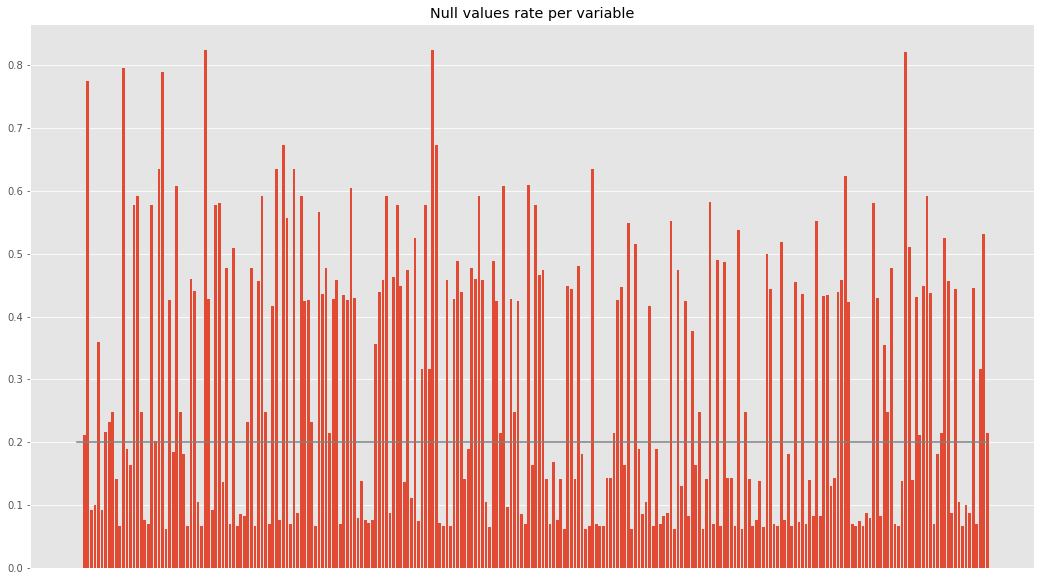

In [56]:
# Show completeness of the data
plt.bar(nulls["col_name"], nulls["null_percentage"]);
plt.title("Null values rate per variable");
plt.plot(nulls["col_name"],[.20]*nulls.shape[0], color = "gray");
plt.xticks([],rotation=90);

In [57]:
# Get all variable names with less than $\alpha$ threshold of null percentage

q_comp_vars = nulls.filter(pl.col("null_percentage")<=0.15)["col_name"].to_list()

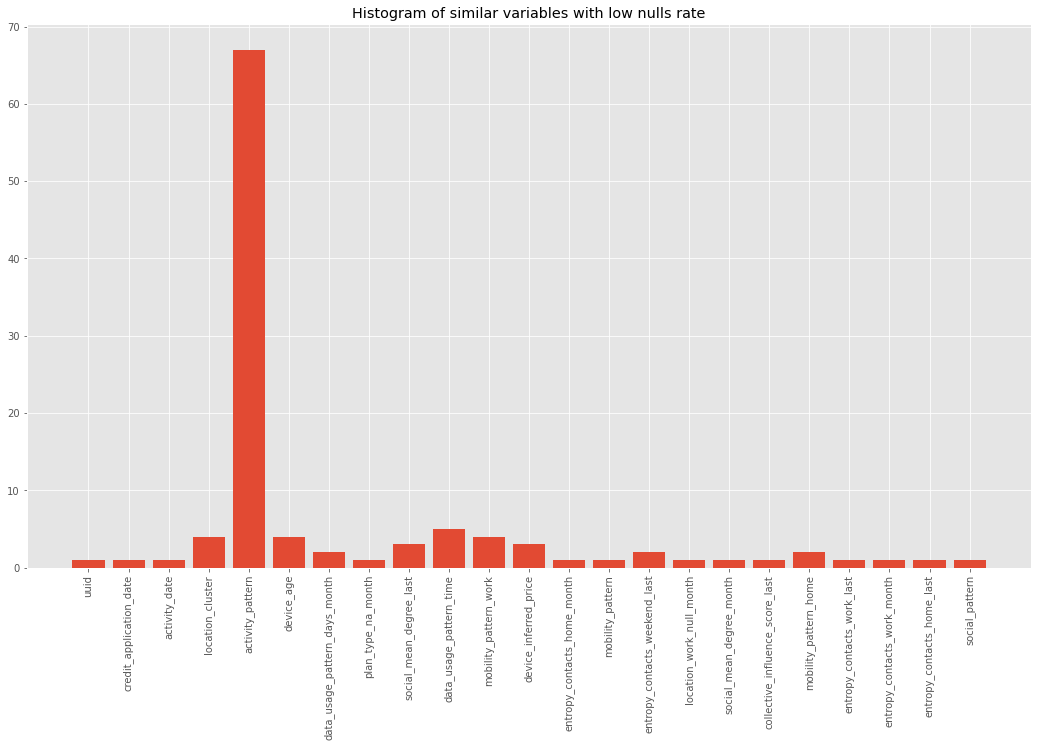

In [58]:
base_names_non_nulls = hp.count_similar_vars(pl.DataFrame(schema = q_comp_vars))
plt.bar(base_names_non_nulls.keys(), base_names_non_nulls.values());
plt.title("Histogram of similar variables with low nulls rate")
plt.xticks(rotation=90);

### <a id='toc1_3_7_'></a>[Nulls by row](#toc0_)

In [59]:
df = df.with_columns(pl.sum_horizontal(
        pl.all().is_null()
    ).alias("total_missing_values"))

In [60]:
alpha=0.7
df.filter(pl.col("total_missing_values") > alpha* len(df.columns)).head(3)

uuid,credit_application_date,default,person_bith_year_month_1_no_aggregation,activity_date_36_month_1_no_aggregation,location_cluster_03_month_1_most_frequent,contract_type_1_month_1_no_aggregation,activity_pattern_35_month_1_no_aggregation,activity_pattern_34_month_12_no_aggregation,activity_pattern_17_month_12_no_aggregation,activity_pattern_02_month_12_no_aggregation,device_age_2_month_1_social_mean,activity_pattern_09_last_12_months_max,client_type_1_month_9_no_aggregation,activity_pattern_07_last_9_months_max,activity_pattern_07_last_12_months_max,line_balance_type_11_last_12_months_max,line_balance_type_09_last_9_months_mean,activity_pattern_21_weekend_month_12_no_aggregation,activity_pattern_09_last_6_months_max,activity_pattern_09_last_9_months_max,line_balance_type_09_last_12_months_mean,activity_pattern_17_month_9_no_aggregation,line_balance_type_01_last_3_months_min,plan_data_month_12_no_aggregation,activity_pattern_25_last_12_months_min,data_usage_pattern_fortnight_1_last_12_months_max,location_work_null_month_9_no_aggregation,line_balance_type_01_last_6_months_min,activity_pattern_21_weekdaynight_month_12_no_aggregation,activity_pattern_03_weekend_month_6_no_aggregation,activity_pattern_25_last_9_months_min,mobility_pattern_03_last_3_months_mean,data_usage_pattern_days_last_6_months_min,activity_pattern_02_month_1_no_aggregation,activity_pattern_02_last_12_months_mean,billing_pattern_03_last_12_months_mean,…,activity_pattern_12_last_12_months_mean,activity_pattern_05_weekdaylight_last_3_months_mean,activity_pattern_14_last_9_months_mean,device_age_3_month_12_no_aggregation,credit_default_home_last_12_months_min,activity_pattern_14_last_6_months_max,device_technology_2_month_1_no_aggregation,activity_pattern_11_month_12_no_aggregation,device_count_1_month_1_no_aggregation,activity_pattern_27_last_9_months_mean,activity_pattern_21_weekdaynight_last_12_months_max,data_usage_pattern_time_8_month_1_social_min,line_balance_type_04_last_6_months_max,mobility_pattern_05_month_6_no_aggregation,data_usage_pattern_time_5_month_1_social_mean,data_usage_pattern_week_1_last_9_months_mean,location_cluster_02_month_9_no_aggregation,credit_default_work_last_6_months_mean,line_balance_type_07_last_9_months_min,data_usage_pattern_fortnight_1_last_9_months_mean,activity_pattern_11_last_9_months_max,activity_pattern_10_month_6_no_aggregation,activity_pattern_10_month_9_no_aggregation,line_months_active_2_last_12_months_mean,data_usage_pattern_days_last_3_months_mean,activity_pattern_10_weekend_last_3_months_mean,data_usage_pattern_fortnight_4_last_6_months_max,activity_pattern_11_weekdaylight_month_1_no_aggregation,activity_pattern_21_weekdaylight_last_12_months_max,location_cluster_02_month_1_no_aggregation,activity_pattern_22_weekend_last_3_months_min,mobility_pattern_05_last_6_months_min,activity_pattern_08_last_9_months_min,activity_pattern_28_last_3_months_mean,device_age_2_month_6_no_aggregation,activity_pattern_11_weekdaynight_month_9_no_aggregation,total_missing_values
str,str,f64,f64,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,u32
"""8bc24208-9e19-436d-abe3-a1dedc…","""2022-10-12""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,255
"""8026f3c9-cd70-4996-918c-373fe7…","""2022-03-25""",1.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,-61.0,null,null,22.0,null,28.0,null,null,null,14.0,null,30.2866,null,null,null,…,null,null,null,null,-21.78,null

### <a id='toc1_3_8_'></a>[Correlation](#toc0_)

In [61]:
# Create a correlation matrix between remaining features
df_corr = df.select(q_comp_vars)\
    .drop(["uuid", "credit_application_date", "activity_date_36_month_1_no_aggregation", "location_cluster_03_month_1_most_frequent"])\
        .filter(~pl.any_horizontal(pl.all().is_null()))\
            .filter(~pl.all_horizontal(pl.all().is_null()))#.corr().to_pandas()

In [62]:
# feature pairs with correlation value
corr_pairs = df_corr.to_pandas().corr().unstack().sort_values().reset_index()
corr_pairs

,level_0,level_1,0
0,mobility_pattern_work_2_last_9_months_mean,mobility_pattern_work_2_last_12_months_mean,-0.971491
1,mobility_pattern_work_2_last_12_months_mean,mobility_pattern_work_2_last_9_months_mean,-0.971491
2,activity_pattern_02_last_6_months_max,activity_pattern_02_last_6_months_mean,-0.970415
3,activity_pattern_02_last_6_months_mean,activity_pattern_02_last_6_months_max,-0.970415
4,activity_pattern_02_last_12_months_mean,activity_pattern_05_last_12_months_mean,-0.956622
...,...,...,...
11020,activity_pattern_03_weekdaynight_last_9_months...,activity_pattern_03_weekdaynight_last_9_months...,1.000000
11021,activity_pattern_11_weekdaynight_last_12_month...,activity_pattern_11_weekdaynight_last_12_month...,1.000000
11022,activity_pattern_08_last_9_months_min,activity_pattern_08_last_9_months_min,1.000000
11023,location_cluster_02_last_6_months_max,location_cluster_02_month_1_no_aggregation,1.000000


In [63]:
# Pairs of every correlated feature
corr_pairs[0] = corr_pairs[0].round(2)
corr_pairs = corr_pairs.loc[corr_pairs[0] !=1].loc[(corr_pairs[0] >.8) | (corr_pairs[0]<-.8)] 

In [64]:
# Check if there are correlated features of non similar variables (family)
dif_fam = []
non_dif_fam = []
non_dif_fam_counter = {}

for i in corr_pairs.index:
    var1, var2 = corr_pairs.loc[i,["level_0","level_1"]]
    base1 = re.split(r'[\d]+', var1)[0]
    base2  = re.split(r'[\d]+', var2)[0]

    if base1 == base2 :
        non_dif_fam.append((base1, base2))
        
        if base1 in non_dif_fam_counter:
            non_dif_fam_counter[base1] += 1

        else:
            non_dif_fam_counter[base1] =0

    else:
        dif_fam.append((base1, base2))
    
non_dif_fam_counter

{'mobility_pattern_work_': 5,
 'activity_pattern_': 249,
 'device_inferred_price_': 1,
 'social_mean_degree_last_': 3,
 'entropy_contacts_weekend_last_': 1}

In [65]:
dif_fam

[('mobility_pattern_', 'location_work_null_month_'),
 ('location_work_null_month_', 'mobility_pattern_')]

### <a id='toc1_3_9_'></a>[Regions](#toc0_)

In [66]:
df.group_by("location_cluster_03_month_1_most_frequent").agg(pl.col("default").sum(), pl.col("uuid").count()).with_columns((pl.col("default")/pl.col("uuid")).alias("default_rate"))

location_cluster_03_month_1_most_frequent,default,uuid,default_rate
str,f64,u32,f64
"""REGION_6""",135.0,1197,0.112782
"""REGION_8""",262.0,1751,0.149629
"""REGION_4""",170.0,1309,0.12987
"""REGION_7""",587.0,4145,0.141616
"""REGION_3""",57.0,463,0.12311
"""REGION_1""",49.0,365,0.134247
null,451.0,2493,0.180907
"""REGION_2""",79.0,540,0.146296
"""REGION_5""",234.0,1812,0.129139
